# Vino Verde DATASET

### OBJECTIVE:  Use machine learning to determine which physiochemical properties make a wine 'good'!

In [18]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('./Datasets/winequality-red.csv')
print('dataset loaded')

dataset loaded


#### Let's check basic informations about the dataset

In [20]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [21]:
df.shape

(1599, 12)

In [22]:
#dataset doesn't have any nan value and is only composed of numerical value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
# variance among variable is high enough to normalize when we will run our model
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
#Split between variables & target

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Let's start the EDA to see the relationship between the variables and the target 'quality'

<function matplotlib.pyplot.show(*args, **kw)>

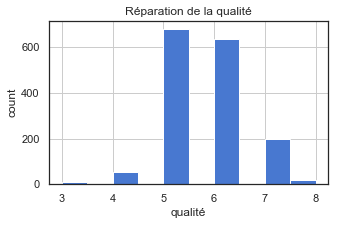

In [25]:
# analysis of the target distribution

plt.figure(figsize=(5,3))
plt.hist(y)
plt.xlabel('qualité')
plt.ylabel('count')
plt.title('Réparation de la qualité')
plt.grid(True)
plt.show

In [26]:
#chance rate
y_max = y[y == 5]
best_score = round(len(y_max)*100/len(y),ndigits=2)
print('chance rate : {}'.format(best_score))

chance rate : 42.59


##### 5 is the most represented class in our target 'wine quality' so our chance rate is around 43%
##### That means that our model must have at least a higher score than 42% otherwise it's worse than guessing randomly

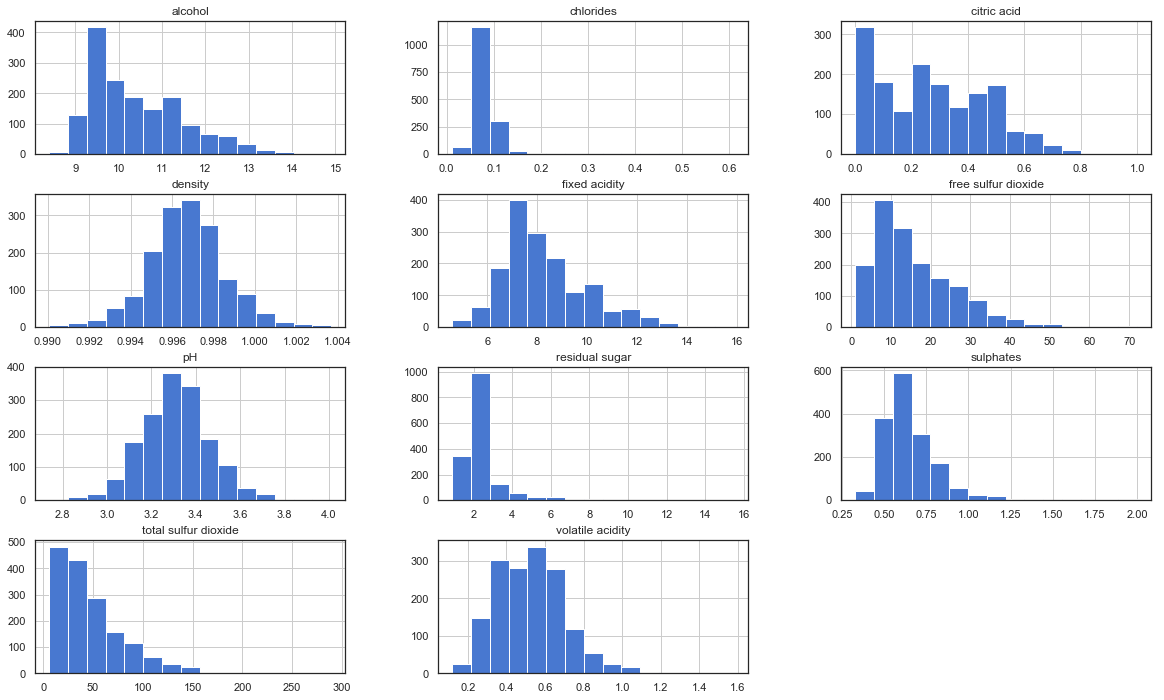

In [27]:
#let's plot the distribution of the independant variables

sns.set(style="white", palette="muted", color_codes=True)
X.hist(bins=15, figsize=(20, 12), layout=(4, 3));

#### let's split of the dataframe in 2 to get pairplot more visible

/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


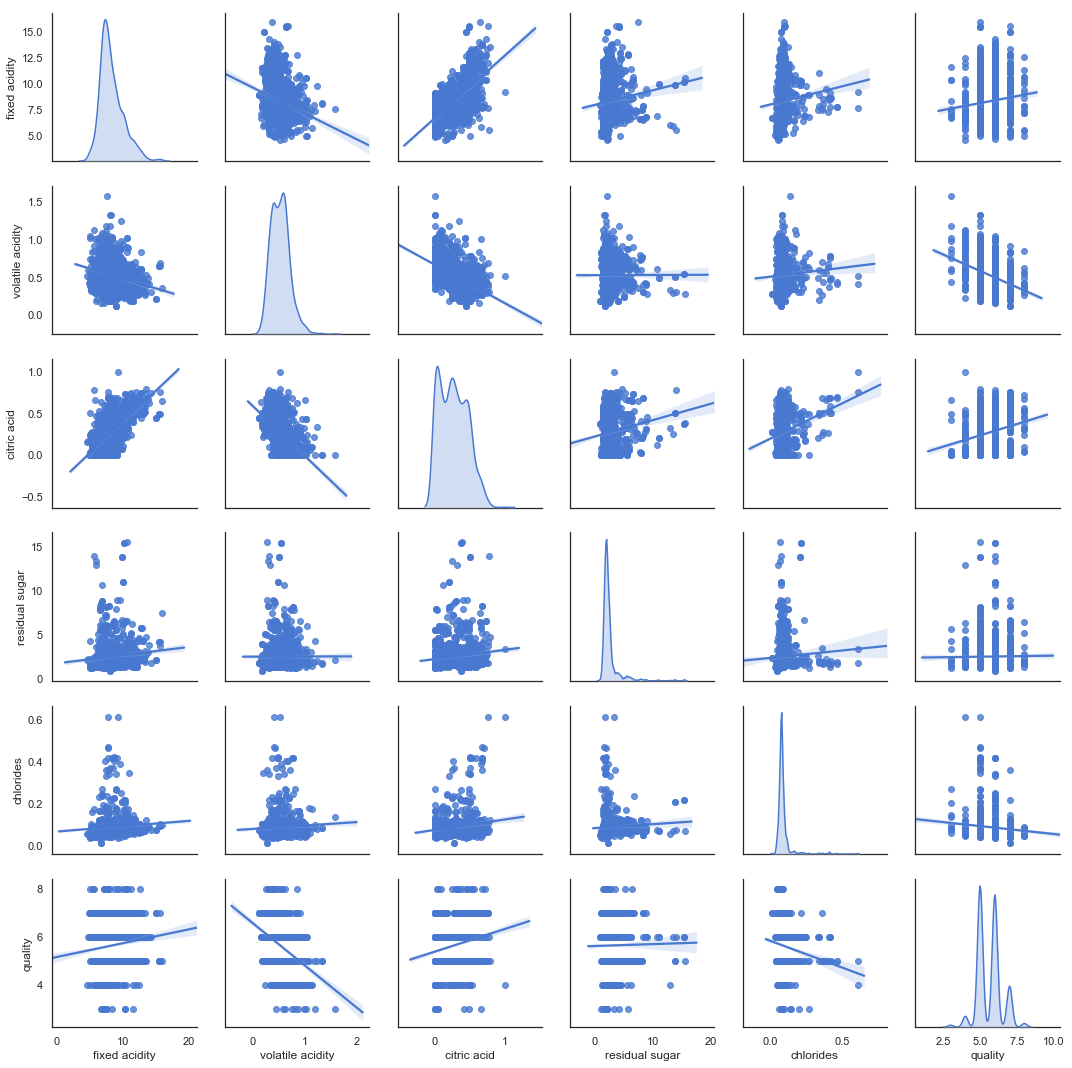

In [28]:
df1 = df.iloc[:,:5]
df1['quality'] = df['quality']
df2 = df.iloc[:,-6:]

sns.pairplot(df1, palette="husl",diag_kind="kde", kind='reg')

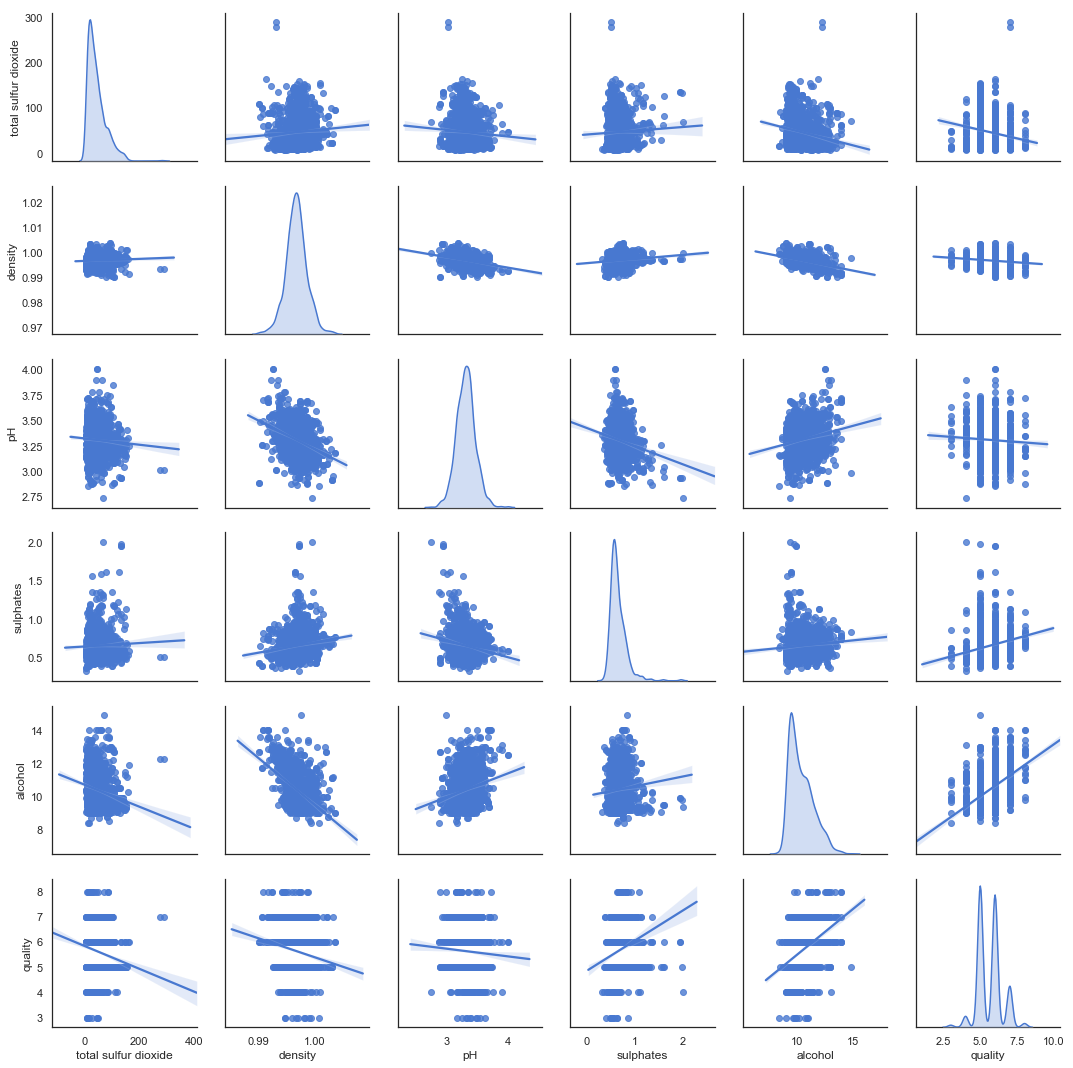

In [29]:
sns.pairplot(df2, palette="husl",diag_kind="kde", kind='reg')

##### Let's use the correlation matrix to analyse much more in depth correlation between quality and rest of independant variables

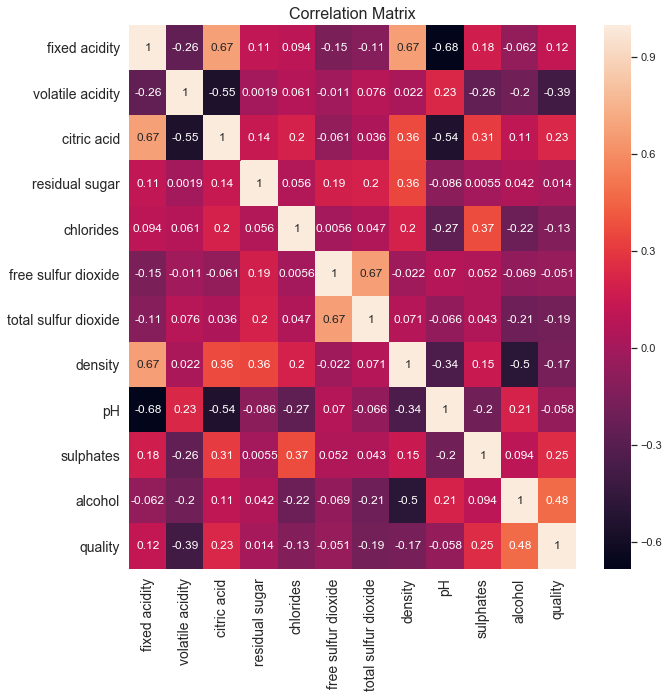

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
sns.heatmap(df.corr(), annot=True, ax=ax)

In [31]:
corr = df.corr()
corr_ordered = corr['quality'].sort_values(ascending=True)
corr_ordered

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [32]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)

In [33]:
feature_ranking = pd.DataFrame(columns=X.columns, data=list(feature_importance) ,index=["Chi2 Score", "P-value"]).transpose()
feature_ranking.sort_values("Chi2 Score", ascending=False)

,Chi2 Score,P-value
total sulfur dioxide,2755.557984,0.000000e+00
free sulfur dioxide,161.936036,3.827288e-33
alcohol,46.429892,7.424038e-09
volatile acidity,15.580289,8.150352e-03
citric acid,13.025665,2.313944e-02
fixed acidity,11.260652,4.645004e-02
sulphates,4.558488,4.720963e-01
residual sugar,4.123295,5.318047e-01
chlorides,0.752426,9.799680e-01
pH,0.154655,9.995265e-01


##### Through the plots and the correlation matrix we can see that the variables pH','free sulfur dioxide','residual sugar','chlorides', 'density' do not have much impact on the target 'wine quality'

##### Chi2 score shows that the other variables with impact on the target, are statistically significative with small P value

##### Let's remove variables not correlate to the quality (correlation coeff = -0.1 < X < 0.1)

In [34]:
df_wine = pd.DataFrame(df.drop(columns=['pH','free sulfur dioxide','residual sugar','chlorides', 'density']))


##### Let's investigate about the variable alcohol, sulphate, volatile acidity

##### let's create classe 1, 2 and 3 for good, normal and bad wine to help data visualisation

In [35]:
bins = [0, 4, 6, 10]
labels = [3,2,1]
df_wine['binned_quality'] = pd.cut(df_wine['quality'], bins=bins, labels=labels)
df_wine['binned_quality']= [int(i) for i in df_wine['binned_quality']]

/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc

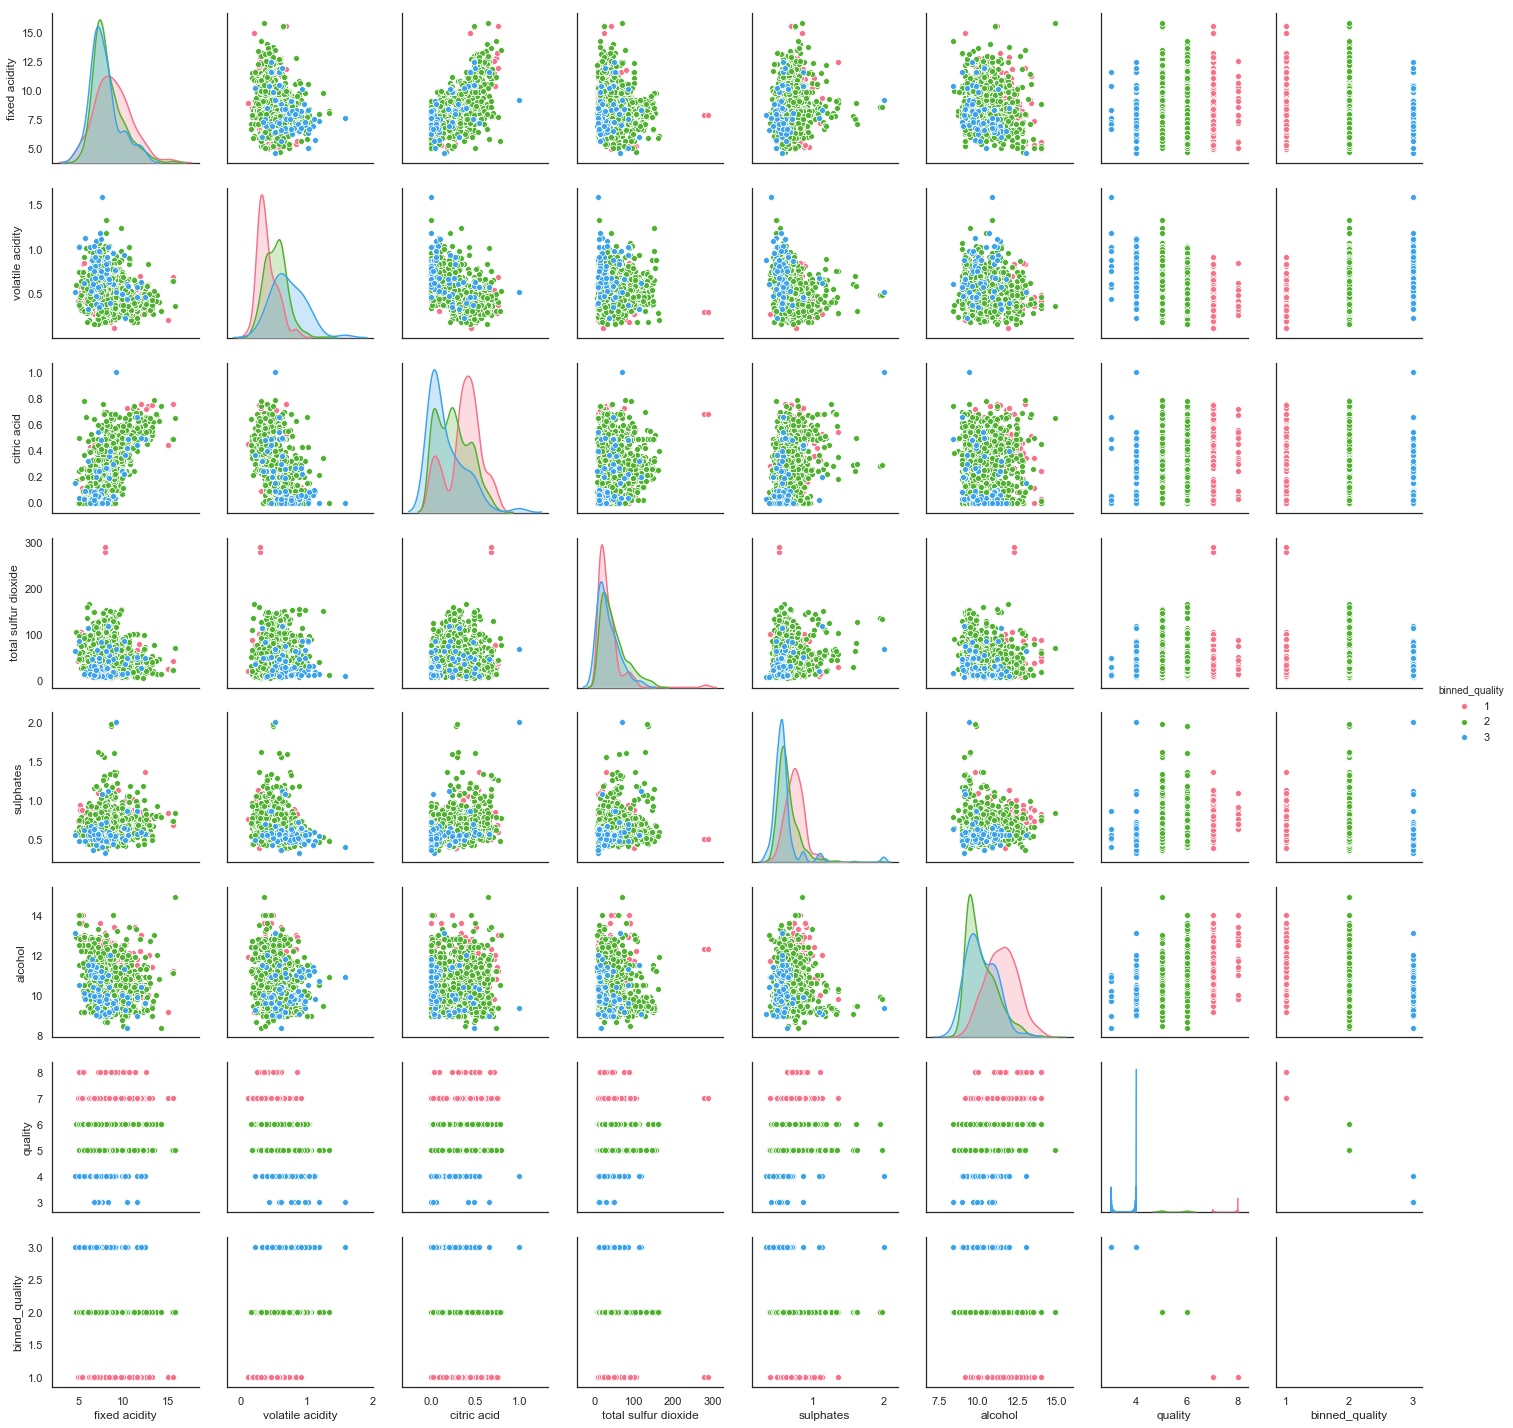

In [36]:
sns.pairplot(df_wine, hue="binned_quality", palette="husl",diag_kind="kde")

##### Acid citric looks like to have a big impact on the quality
##### Volatile acidity as well, but there is a clear order and a range should be created to help the model
##### Alcohol seem to be important as the more there is alcohol, the better the wine is ranked.

##### let's plot them again to check their evolutions and their distribution to see if they are following a normale distribution

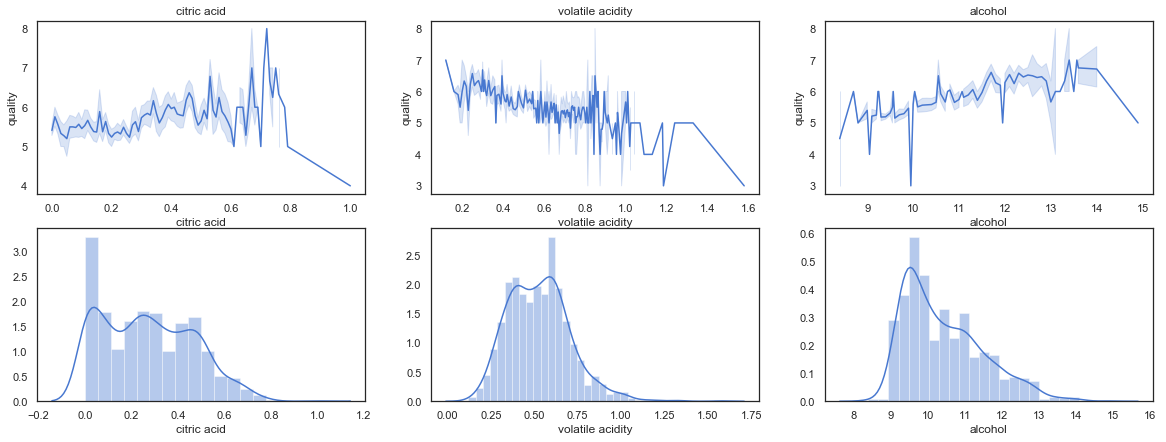

In [37]:
col = ["citric acid", "volatile acidity", "alcohol"]

fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(20,7))

for nrow in range(2):
    for ncol in range(len(col)):
        if nrow < 1:
            ax = sns.lineplot(x=col[ncol], y="quality", data=df_wine ,ax=axes[nrow,ncol])
            ax.set(title=col[ncol])
        else:
            ax = sns.distplot(df_wine[col[ncol]], ax=axes[nrow,ncol])

##### PREPROCESSING
##### Creation of target and dependant variables and split between train & test
##### let's start with Logistic Regression 

In [38]:
X = df_wine.iloc[:,:-2]
y = df_wine['binned_quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
classifier.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
from sklearn.model_selection import cross_val_score
print("Score before cross validation :{}".format(classifier.score(X_test_sc, y_test)))
print("Score after cross validation :{}".format(cross_val_score(classifier, X_test_sc, y_test).mean()))

Score before cross validation :0.83125
Score after cross validation :0.8250213224474914


/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


##### Score is good (>0.8 after cross validation) but let's check a Random Forest to see if we can go further in accuracy

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc)*100)

              precision    recall  f1-score   support

           1       0.74      0.54      0.62        65
           2       0.89      0.97      0.93       396
           3       1.00      0.05      0.10        19

   micro avg       0.88      0.88      0.88       480
   macro avg       0.88      0.52      0.55       480
weighted avg       0.87      0.88      0.85       480

[[ 35  30   0]
 [ 12 384   0]
 [  0  18   1]]
87.5


In [43]:
print('score Random FOREST on train set {}'.format(rfc.score(X_train, y_train)))
print('score Random FOREST on test set {}'.format(rfc.score(X_test, y_test)))

score Random FOREST on train set 1.0
score Random FOREST on test set 0.875


##### We are clearly overfitting 
##### We should try to adapt the tree in the random forest by undertaking a Grid Searching and modifying hyperparameters

In [44]:
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],
             'min_samples_split' : range(10,500,100),
             'max_depth':[1,3,5,10,20,50],
            'n_estimators':[100, 500, 800, 1200]}

clf = GridSearchCV(rfc, tree_para, cv=5)
clf.fit(X_train,y_train)
pred_rfc = clf.predict(X_test)

print('score after grid search CV on train set {}'.format(rfc.score(X_train, y_train)))
print('score after grid search CV on test set {}'.format(rfc.score(X_test, y_test)))

score after grid search CV on train set 1.0
score after grid search CV on test set 0.875


##### Let's try a Decision tree classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42,criterion='gini')
dtc.fit(X_train, y_train)

test = dtc.score(X_test, y_test)
train = dtc.score(X_train, y_train)
depth = dtc.max_depth

print('Decision Tree model s score on train set : {}'.format(train))
print('Decision Tree model s score on test set : {}'.format(test))

Decision Tree model s score on train set : 1.0
Decision Tree model s score on test set : 0.7916666666666666


##### We can maybe improve the result with by combining Adaboost model with Decesion Tree Classfier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

regressor_ada = AdaBoostClassifier(n_estimators=50, base_estimator=dtc,learning_rate=1)
regressor_ada.fit(X_train, y_train)
print('score test {}'.format(regressor_ada.score(X_test, y_test)))
print('score train {}'.format(regressor_ada.score(X_train, y_train)))

score test 0.8229166666666666
score train 1.0


##### We are still overfitting. So let's run a grid search over this adaboost model

In [78]:
tree_para = {'base_estimator__criterion':['gini','entropy'],
             'base_estimator__min_samples_split' : range(10,500,20),
             'base_estimator__max_depth':[1,2,4,5,6,7,8,10,20,50]}
clf = GridSearchCV(regressor_ada, tree_para, cv=5)
clf.fit(X_train,y_train)

test = clf.score(X_test, y_test)
train = clf.score(X_train, y_train)

print('Model s score on train set : {}'.format(train))
print('Model s score on test set : {}'.format(test))
print(clf.best_params_)

/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model s score on train set : 1.0
Model s score on test set : 0.86875
{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 20, 'base_estimator__min_samples_split': 10}


##### as we are clearly overfitting, let's reduce the depth of the tree and let's keep a low value for samples split

In [80]:
tree_para2 = {'base_estimator__criterion':['gini'],
             'base_estimator__min_samples_split' : [2,5,7,10],
             'base_estimator__max_depth':[2,3,4],
             'n_estimators': [90, 80, 70]}
clf2 = GridSearchCV(regressor_ada, tree_para2, cv=5)
clf2.fit(X_train,y_train)

test = clf2.score(X_test, y_test)
train = clf2.score(X_train, y_train)

print('Model s score on train set : {}'.format(train))
print('Model s score on test set : {}'.format(test))

Model s score on train set : 0.9276139410187667
Model s score on test set : 0.83125


#### We are still overfitting a little but the scores are quite high and acceptable :) 